# Analysis of co-simulation of power grid and control network using Mosaik co-simulation framework

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
import itertools


In [2]:
# The files from simulation to process

In [3]:
path='data/'
output_figures = 'output/'
extension='_int3'
file_readings_t = path+'readings'+extension+'.csv'
file_simulators_t = path+'times'+extension+'.csv'
file_bro_t = ''

In [4]:
# Make an array of the readings
readings = np.genfromtxt(file_readings_t, delimiter=';', dtype = ( 'datetime64[us]', '|S27', '|S8', float))
simulators = np.genfromtxt(file_simulators_t, delimiter=';', dtype = ( '|S16', '|S51', 'datetime64[us]')) 

In [5]:
# Determine minimal time from the readings, which will be the reference time
ref_t = min(readings['f0'][0], simulators['f2'][0])

In [6]:
# Adjust the times 
readings['f0'] = readings['f0']-ref_t
simulators['f2'] = simulators['f2']-ref_t

In [7]:
# Preparing the data to plot from sensor readings
readings_1 = readings['f3'][(np.char.equal(readings['f2'],b'I_real')) & (np.char.equal(readings['f1'],b'sensor_4-branch_36'))]
ts_r_1 = readings['f0'][(np.char.equal(readings['f2'],b'I_real')) & (np.char.equal(readings['f1'],b'sensor_4-branch_36'))]
ts_r_1 = ts_r_1.astype('int64')/1e6 #, dtype='int32'

readings_2 = readings['f3'][(np.char.equal(readings['f2'],b'I_real')) & (np.char.equal(readings['f1'],b'sensor_3-branch_25'))]
ts_r_2 = readings['f0'][(np.char.equal(readings['f2'],b'I_real')) & (np.char.equal(readings['f1'],b'sensor_3-branch_25'))]
ts_r_2 = ts_r_2.astype('int64')/1e6

readings_3 = readings['f3'][(np.char.equal(readings['f2'],b'I_real')) & (np.char.equal(readings['f1'],b'sensor_2-branch_24'))]
ts_r_3 = readings['f0'][(np.char.equal(readings['f2'],b'I_real')) & (np.char.equal(readings['f1'],b'sensor_2-branch_24'))]
ts_r_3 = ts_r_3.astype('int64')/1e6

readings_4 = readings['f3'][(np.char.equal(readings['f2'],b'I_real')) & (np.char.equal(readings['f1'],b'sensor_1-branch_19'))]
ts_r_4 = readings['f0'][(np.char.equal(readings['f2'],b'I_real')) & (np.char.equal(readings['f1'],b'sensor_1-branch_19'))]
ts_r_4 = ts_r_4.astype('int64')/1e6

In [8]:
# Preparing the data to plot from simulators events
simulators_1 = simulators['f1'][(np.char.equal(simulators['f0'],b'PYPOWER-API'))&(np.char.equal(simulators['f1'],b'Recalculated power flow equations'))]
ts_s_1 = simulators['f2'][(np.char.equal(simulators['f0'],b'PYPOWER-API'))&(np.char.equal(simulators['f1'],b'Recalculated power flow equations'))]
ts_s_1 = ts_s_1.astype('int64')/1e6 

simulators_2 = simulators['f1'][(np.char.equal(simulators['f0'],b'PYPOWER-API'))&(np.char.equal(simulators['f1'],b'New topology received...'))]
ts_s_2 = simulators['f2'][(np.char.equal(simulators['f0'],b'PYPOWER-API'))&(np.char.equal(simulators['f1'],b'New topology received...'))]
ts_s_2 = ts_s_2.astype('int64')/1e6 

simulators_5 = simulators['f1'][(np.char.equal(simulators['f0'],b'RTU-API'))&(np.char.equal(simulators['f1'],b'Pass the commands to TOPOLOGY'))]
ts_s_5 = simulators['f2'][(np.char.equal(simulators['f0'],b'RTU-API'))&(np.char.equal(simulators['f1'],b'Pass the commands to TOPOLOGY'))]
ts_s_5 = ts_s_5.astype('int64')/1e6 

simulators_4 = simulators['f1'][(np.char.equal(simulators['f0'],b'TOPOLOGY-API'))&(np.char.equal(simulators['f1'],b'change of switchstates.... refreshing the topology'))]
ts_s_4 = simulators['f2'][(np.char.equal(simulators['f0'],b'TOPOLOGY-API'))&(np.char.equal(simulators['f1'],b'change of switchstates.... refreshing the topology'))]
ts_s_4 = ts_s_4.astype('int64')/1e6 

simulators_3 = simulators['f1'][(np.char.equal(simulators['f0'],b'TOPOLOGY-API'))&(np.char.equal(simulators['f1'],b'Sending new topology to PYPOWER'))]
ts_s_3 = simulators['f2'][(np.char.equal(simulators['f0'],b'TOPOLOGY-API'))&(np.char.equal(simulators['f1'],b'Sending new topology to PYPOWER'))]
ts_s_3 = ts_s_3.astype('int64')/1e6 

In [9]:
# Convert text to numbers
simulators_1[:] = 0.0 
simulators_2[:] = 0.1
#simulators_3[:] = 0.2
simulators_4[:] = 0.2
simulators_5[:] = 0.3

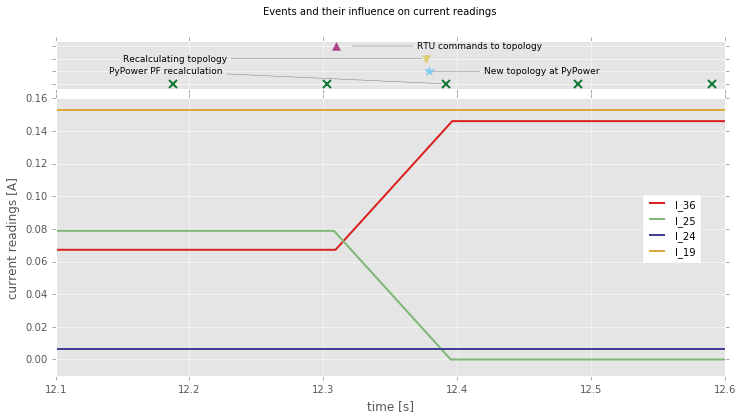

In [13]:
# Plot it all 

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid((6,1), (1,0), rowspan=5)

branch_36 = ax1.plot(ts_r_1, readings_1, linewidth=2, color='#D92120')
branch_25 = ax1.plot(ts_r_2, readings_2, linewidth=2, color='#7DB874')
branch_24 = ax1.plot(ts_r_3, readings_3, linewidth=2, color='#404096')
branch_19 = ax1.plot(ts_r_4, readings_4, linewidth=2, color='#DEA73A')

#ax1.setp(branch_36, linewidth=2) 
#ax1.setp(branch_25, linewidth=2) 
#ax1.setp(branch_24, linewidth=2) 
#ax1.setp(branch_19, linewidth=2) 

marker = itertools.cycle(('x', '*',  'v', '^', 'o', '<', '>', 's', '8', 'p'))

plt.style.use('ggplot') # ggplot , bmh , classic, dark_background, fivethirtyeight , 
                                      # grayscale, seaborn-bright, seaborn-dark-palette

labels = ['l_36', 'l_25', 'l_24', 'l_19']
legend = ax1.legend(labels,
          bbox_to_anchor=(0.97, 0.67),
          fontsize=10)
#ax1.legend(ax1.patches[0:3], 
#           labels[0:3], 
#           bbox_to_anchor=(1.05, 1),
#           fontsize=12)

legend.get_frame().set_facecolor('#ffffff')


fig.suptitle("Events and their influence on current readings")
ax1.set_xlabel("time [s]")
ax1.set_ylabel("current readings [A]")
ax1.set_xlim(12.1, 12.6)
ax1.set_ylim(-0.01, 0.16)


ax2 = plt.subplot2grid((6,1), (0,0))
recalc_pf = ax2.plot(ts_s_1, simulators_1, linestyle='None', markeredgecolor='#117733', markerfacecolor='#117733', marker=next(marker), markersize=8, mew=2) # * x X o + p P s
topo_pf = ax2.plot(ts_s_2, simulators_2, linestyle='None', markeredgecolor='#88CCEE', markerfacecolor= '#88CCEE', marker=next(marker), markersize=10)
rtu_comm = ax2.plot(ts_s_3, simulators_3, 'r<')
topo_swst = ax2.plot(ts_s_4, simulators_4, linestyle='None', markeredgecolor='#DDCC77', markerfacecolor= '#DDCC77', marker=next(marker), markersize=8)
topo_pyp = ax2.plot(ts_s_5, simulators_5, linestyle='None', markeredgecolor='#AA4488', markerfacecolor= '#AA4488', marker=next(marker), markersize=8)


y = [0, 0.1, 0.2, 0.3]
#ylabels = ["PyPower PF Recalculation", "New topology at PyPower", "Sending new TOPO to PyPower", "TOPO-change of switchstates", "RTU pass commands to topology"]
ylabels = ["PyPower PF Recalculation", "New topology at PyPower", "TOPO-change of switchstates", "RTU pass commands to topology"]




ax2.set_yticks(y)
ax2.set_yticklabels([])
ax2.set_ylim(-0.04,0.34)
ax2.set_xticklabels([])
ax2.set_xlim(12.1, 12.6) #39.5-40

### Manual legend ###

ax2.annotate('RTU commands to topology',
             (12.32, 0.3), xycoords='data',
             xytext=(12.37, 0.3), textcoords='data',ha='left', va='center',
             arrowprops=dict(arrowstyle='-',connectionstyle="arc3",color='grey'),
            size=9)
ax2.annotate('Recalculating topology',
             (12.375, 0.2), xycoords='data',
             xytext=(12.15, 0.2), textcoords='data',ha='left', va='center',
             arrowprops=dict(arrowstyle='-',connectionstyle="arc3",color='grey'),
            size=9)
ax2.annotate('New topology at PyPower',
             (12.38, 0.1), xycoords='data',
             xytext=(12.42, 0.1), textcoords='data',ha='left', va='center',
             arrowprops=dict(arrowstyle='-',connectionstyle="arc3",color='grey'),
            size=9)
ax2.annotate('PyPower PF recalculation',
             (12.39, 0.0), xycoords='data',
             xytext=(12.14, 0.1), textcoords='data',ha='left', va='center',
             arrowprops=dict(arrowstyle='-',connectionstyle="arc3",color='grey'),
            size=9)


#red_patch = mpatches.Patch(color='red', label='branch_36')

#plt.legend(handles=[red_patch])

plt.show()
fig.savefig(output_figures+'one_event'+extension+'.eps', bbox_inches='tight',format='eps', dpi=1200)



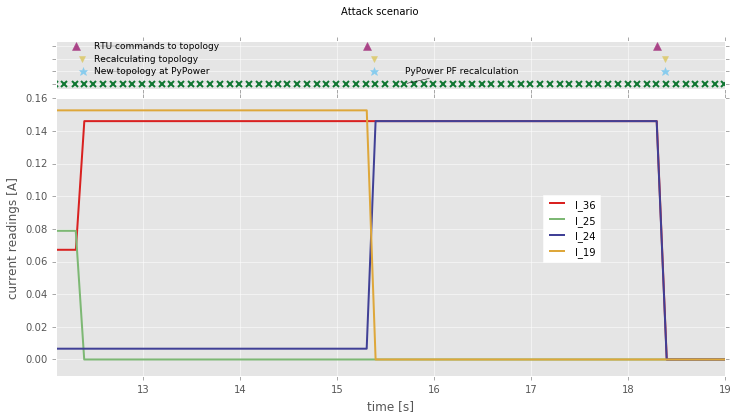

In [14]:
#plot the attack
fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid((6,1), (1,0), rowspan=5)

branch_36 = ax1.plot(ts_r_1, readings_1, linewidth=2, color='#D92120')
branch_25 = ax1.plot(ts_r_2, readings_2, linewidth=2, color='#7DB874')
branch_24 = ax1.plot(ts_r_3, readings_3, linewidth=2, color='#404096')
branch_19 = ax1.plot(ts_r_4, readings_4, linewidth=2, color='#DEA73A')

marker = itertools.cycle(('x', '*',  'v', '^', 'o', '<', '>', 's', '8', 'p'))



plt.style.use('ggplot') # ggplot , bmh , classic, dark_background, fivethirtyeight , 
                                      # grayscale, seaborn-bright, seaborn-dark-palette

labels = ['l_36', 'l_25', 'l_24', 'l_19']

legend = ax1.legend(labels,
          bbox_to_anchor=(0.82, 0.67),
          fontsize=10)
#ax1.legend(ax1.patches[0:3], 
#           labels[0:3], 
#           bbox_to_anchor=(1.05, 1),
#           fontsize=12)

legend.get_frame().set_facecolor('#ffffff')


fig.suptitle("Attack scenario")
ax1.set_xlabel("time [s]")
ax1.set_ylabel("current readings [A]")
ax1.set_xlim(12.1, 19)
ax1.set_ylim(-0.01, 0.16)


ax2 = plt.subplot2grid((6,1), (0,0))
recalc_pf = ax2.plot(ts_s_1, simulators_1, linestyle='None', markeredgecolor='#117733', markerfacecolor='#117733', marker=next(marker), markersize=6, mew=2) # * x X o + p P s
topo_pf = ax2.plot(ts_s_2, simulators_2, linestyle='None', markeredgecolor='#88CCEE', markerfacecolor= '#88CCEE', marker=next(marker), markersize=9)
rtu_comm = ax2.plot(ts_s_3, simulators_3, 'r<')
topo_swst = ax2.plot(ts_s_4, simulators_4, linestyle='None', markeredgecolor='#DDCC77', markerfacecolor= '#DDCC77', marker=next(marker), markersize=6)
topo_pyp = ax2.plot(ts_s_5, simulators_5, linestyle='None', markeredgecolor='#AA4488', markerfacecolor= '#AA4488', marker=next(marker), markersize=8)



y = [0, 0.1, 0.2, 0.3]
#ylabels = ["PyPower PF Recalculation", "New topology at PyPower", "Sending new TOPO to PyPower", "TOPO-change of switchstates", "RTU pass commands to topology"]
ylabels = ["PyPower PF Recalculation", "New topology at PyPower", "TOPO-change of switchstates", "RTU pass commands to topology"]




ax2.set_yticks(y)
ax2.set_yticklabels([])
ax2.set_ylim(-0.04,0.34)
ax2.set_xticklabels([])
ax2.set_xlim(12.1, 19) #39.5-40

### Manual legend ###
ax2.annotate('RTU commands to topology',
             (12.5, 0.3), xycoords='data',
             xytext=(12.5, 0.3), textcoords='data',ha='left', va='center',
             arrowprops=dict(arrowstyle='-',connectionstyle="arc3",color='grey'),
            size=9)
ax2.annotate('Recalculating topology',
             (12.5, 0.2), xycoords='data',
             xytext=(12.5, 0.2), textcoords='data',ha='left', va='center',
             arrowprops=dict(arrowstyle='-',connectionstyle="arc3",color='grey'),
            size=9)
ax2.annotate('New topology at PyPower',
             (12.5, 0.1), xycoords='data',
             xytext=(12.5, 0.1), textcoords='data',ha='left', va='center',
             arrowprops=dict(arrowstyle='-',connectionstyle="arc3",color='grey'),
            size=9)
ax2.annotate('PyPower PF recalculation',
             (15.7, 0.0), xycoords='data',
             xytext=(15.7, 0.1), textcoords='data',ha='left', va='center',
             arrowprops=dict(arrowstyle='-',connectionstyle="arc3",color='black'),
            size=9)
#red_patch = mpatches.Patch(color='red', label='branch_36')

#plt.legend(handles=[red_patch])

plt.show()
fig.savefig(output_figures+'attack'+extension+'.eps', bbox_inches='tight',format='eps', dpi=1200)

In [57]:
#times with and without monitoring
file_scada_server_mon = path+'commands_server_mon.txt'
file_scada_server_nomon = path+'commands_server_nomon.txt'

mon_times = np.loadtxt(file_scada_server_mon, dtype=np.float64)
mon_times = mon_times * 1000 # convert to milliseconds 

mon_var = np.var(mon_times)
mon_mean = np.mean(mon_times)

nomon_times = np.loadtxt(file_scada_server_nomon, dtype=np.float64)
nomon_times = nomon_times * 1000 # convert to milliseconds 

nomon_var = np.var(nomon_times)
nomon_mean = np.mean(nomon_times)

print("With monitoring, the communication takes on average {} ms. Variance is {} ms. \n".format(mon_mean, mon_var))
print("Without monitoring, the communication takes on average {} ms. Variance is {} ms. \n".format(nomon_mean, nomon_var))
print("Difference: {} ms.".format(mon_mean-nomon_mean))

With monitoring, the communication takes on average 0.9345555555555565 ms. Variance is 0.045345802469136554 ms. 

Without monitoring, the communication takes on average 0.9324444444444416 ms. Variance is 0.03433380246913566 ms. 

Difference: 0.0021111111111148384 ms.
